# Defining the Question

a) Specifying the Data Analytic Question

Ho:Average bluecars taken from 75015 on a weekend = bluecars taken from 75017 on a weekend

H1:Average bluecars taken from 75015 on a weekend ≠ average bluecars taken from 75017 on a weekend

b) Defining the Metric for success

Metric of success is either accepting the null hypothesis or accepting the alternative hypothesis

# Reading the data

In [1]:
# import our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# loading our dataset
df = pd.read_csv('autolib_daily_events_postal_code.csv')

# Checking the data

In [4]:
# determine no of records in our dataset
df.shape

(16085, 13)

our dataset has 13 columns and 16085 rows

In [5]:
# previewing the top of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# previewing the bottom of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# checking for our dataset info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
# convert the column date to datetime format
df['date'] = pd.to_datetime(df['date'])
# check the format of date column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

# Tidying the dataset

In [9]:
# drop irrelevant columns and remain with the relevant
df.drop(df.columns[[2,3,6,7,8,9,10,11,12]], axis=1, inplace=True)
df

,Postal code,date,day_type,BlueCars_taken_sum
0,75001,2018-01-01,weekday,110
1,75001,2018-01-02,weekday,98
2,75001,2018-01-03,weekday,138
3,75001,2018-01-04,weekday,104
4,75001,2018-01-05,weekday,114
...,...,...,...,...
16080,95880,2018-06-15,weekday,15
16081,95880,2018-06-16,weekend,19
16082,95880,2018-06-17,weekend,33
16083,95880,2018-06-18,weekday,11


In [11]:
# standardize the column names
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['postal_code', 'date', 'day_type', 'bluecars_taken_sum'], dtype='object')

In [12]:
# check for null values in each column
df.isnull().sum()

postal_code           0
date                  0
day_type              0
bluecars_taken_sum    0
dtype: int64

In [13]:
# check the number of duplicates
df.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


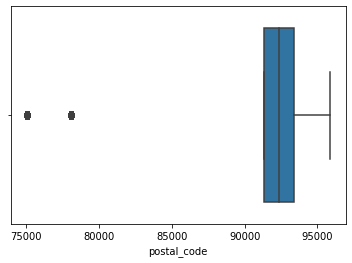

In [16]:
# check for outliers in postal_code and bluecars_taken_sum
sns.boxplot(df['postal_code'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


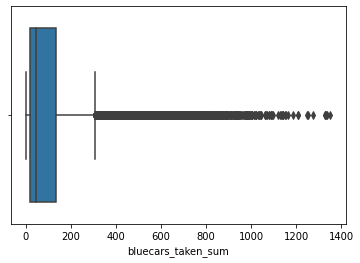

In [17]:
sns.boxplot(df['bluecars_taken_sum'])

We ignore the outliers as there may have been days where few cars or more have been taken from the postal codes

# Univariate Analysis



1.   Measures of Central Tendency




In [18]:
# MEAN
df['bluecars_taken_sum'].mean()

125.92695057506994

In [19]:
# MEDIAN
df['bluecars_taken_sum'].median()

46.0

In [20]:
# MODE
df['bluecars_taken_sum'].mode()

0    12
dtype: int64

The mean of bluecars_taken = 125.93

The median of bluecars_taken = 46

The mode of bluecars_taken = 12




2.   Measures of dispersion



In [21]:
# Variance
df['bluecars_taken_sum'].var()

34383.01611333789

The variance is 34383

In [22]:
# Standard deviation
df['bluecars_taken_sum'].std()

185.42657876727893

The standard deviation is 185.43

In [23]:
# Range
maximum_taken = df['bluecars_taken_sum'].max()
minimum_taken = df['bluecars_taken_sum'].min()

maximum_taken-minimum_taken

1352

The range between the maximum bluecars taken and the minimum taken is 1352

In [24]:
# Quartiles
df['bluecars_taken_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

The lower quartile value(0.25) is 20

The upper quartile value(0.75) is 135

In [25]:
# Interquartile range
Q3 = df['bluecars_taken_sum'].quantile(0.75)
Q1 = df['bluecars_taken_sum'].quantile(0.25)

Q3 - Q1

115.0

The interquartile range is 115

In [26]:
# kurtosis
df['bluecars_taken_sum'].kurt()

6.172692305510042

The kurtosis is 6.

Since it is greater than 1 the distribution is leptorkutic

In [27]:
# skewness
df['bluecars_taken_sum'].skew()

2.4063548974959086

The skewness is 2.4

Since it is greater than 1, the distribution is right skewed




3.   Visualizations



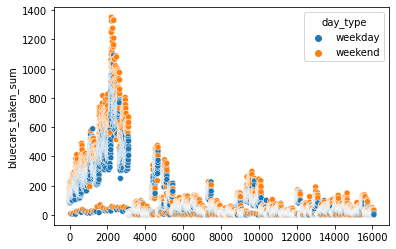

In [29]:
# scatterplot
sns.scatterplot(x=df.index, y=df['bluecars_taken_sum'], hue=df['day_type'])

In [92]:
# lineplot
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1.5)

[Text(0.5, 0, 'index')]

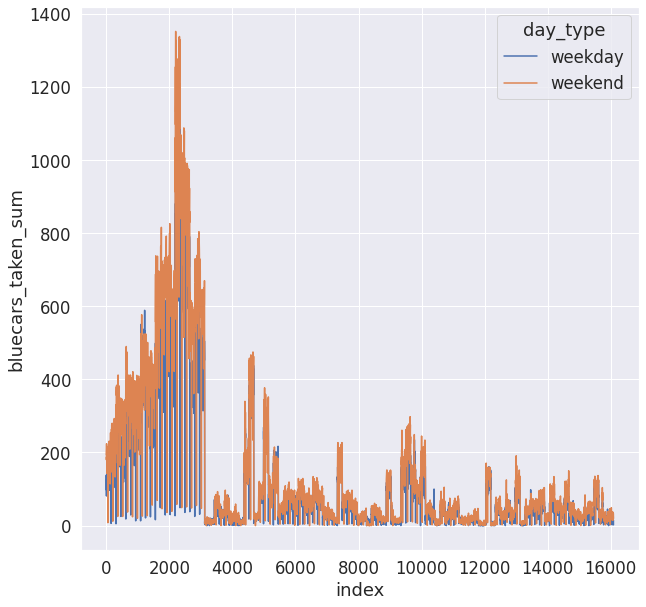

In [33]:
fig=sns.lineplot(x=df.index,y=df['bluecars_taken_sum'], markevery=1,markers='d',data=df,hue=df['day_type'])
fig.set(xlabel='index')

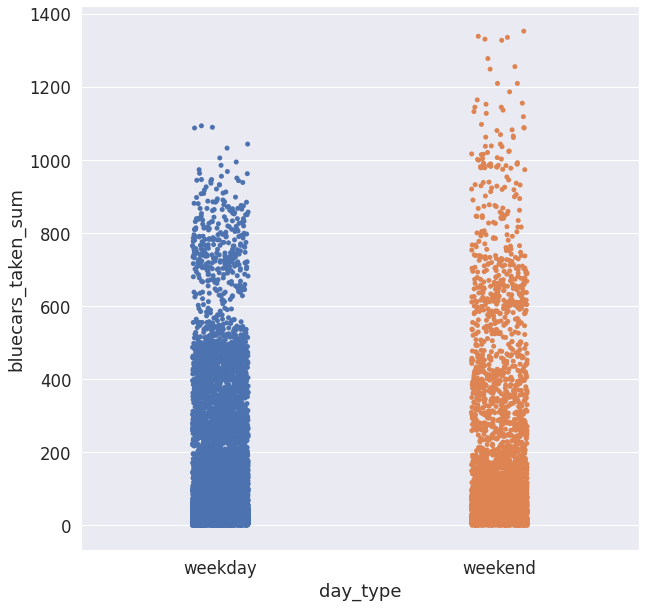

In [34]:
 # strip plot
 sns.stripplot(x=df['day_type'], y=df['bluecars_taken_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


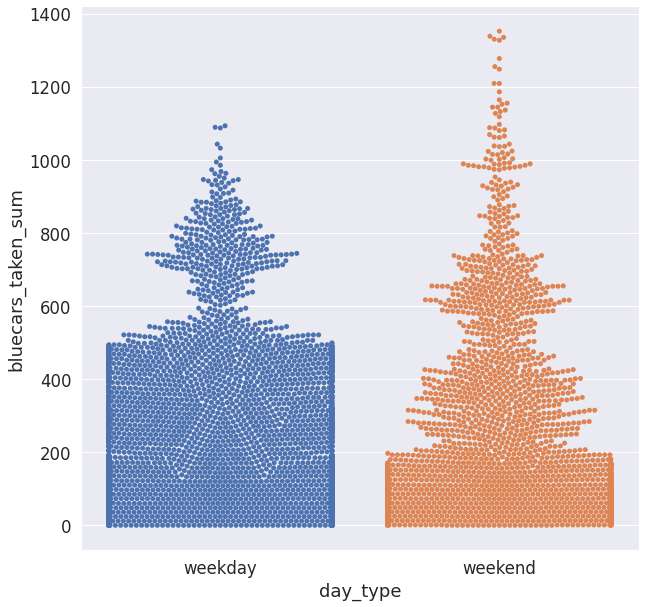

In [35]:
# swarm plot
sns.swarmplot(x=df['day_type'], y=df['bluecars_taken_sum'])

From our visualizations it is evident that bluecars taken on a weekend was more compared to the number taken on a weekday

(array([1.2077e+04, 1.4740e+03, 9.9900e+02, 7.6700e+02, 2.8800e+02,
        2.7600e+02, 1.2700e+02, 5.0000e+01, 1.9000e+01, 8.0000e+00]),
 array([   0. ,  135.2,  270.4,  405.6,  540.8,  676. ,  811.2,  946.4,
        1081.6, 1216.8, 1352. ]),
 <a list of 10 Patch objects>)

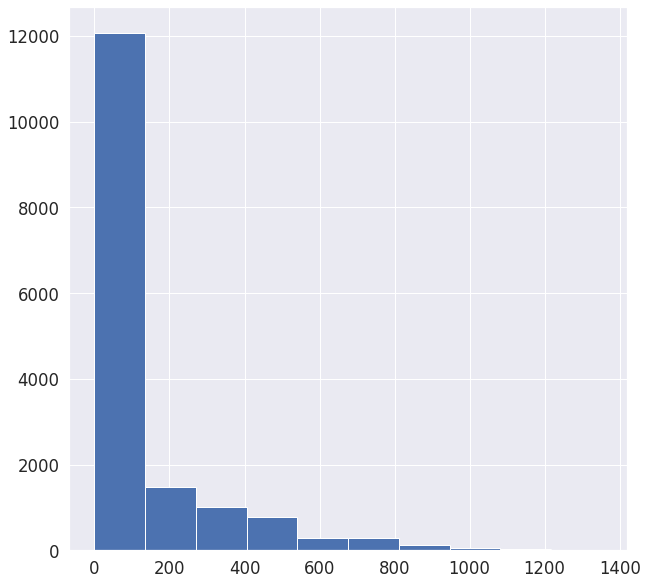

In [36]:
# histogram
plt.hist(df['bluecars_taken_sum'])

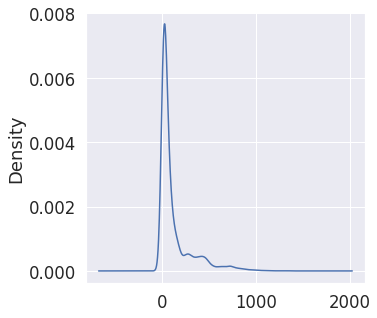

In [37]:
# density plots
plt.figure(figsize=(5,5))
df['bluecars_taken_sum'].plot(kind='density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


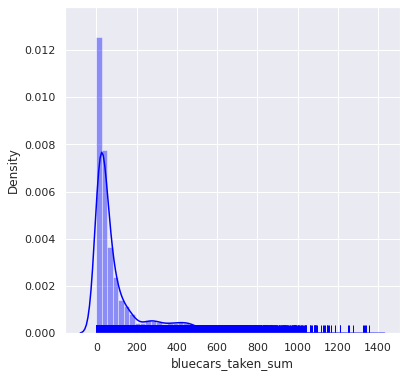

In [38]:
# distplot
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['bluecars_taken_sum'],color='blue',rug=True)

Categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


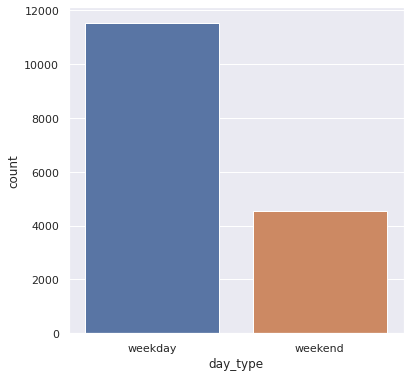

In [40]:
# barchart
sns.countplot(df['day_type'])

From our countplot the number of cars taken on a weekday were more compared to the weekend

([<matplotlib.patches.Wedge at 0x7fec0f5f5190>,
 [Text(-0.8526364997621182, -0.6949899274618329, 'WEEKDAY'),
  Text(0.8526364346924611, 0.6949900072914205, 'WEEKEND')],
 [Text(-0.4650744544157007, -0.3790854149791815, '71.769'),
  Text(0.4650744189231605, 0.37908545852259296, '28.231')])

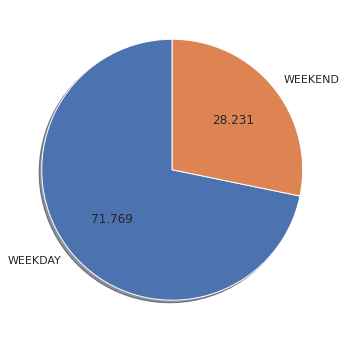

In [43]:
# piechart
plt.pie(df['day_type'].value_counts(),startangle=90,autopct='%.3f',
        labels=['WEEKDAY','WEEKEND'],shadow=True)

From our piechart cars taken on weekday were 71.77%

While cars taken on the weekend were 28.23%

# Bivariate Analysis

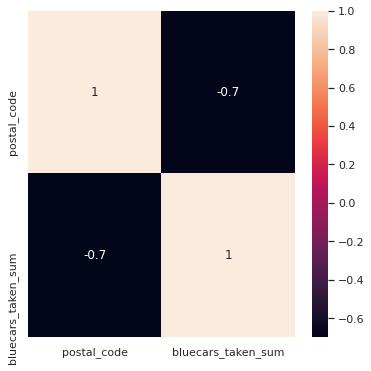

In [44]:
# heatmap correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 1008x1008 with 0 Axes>

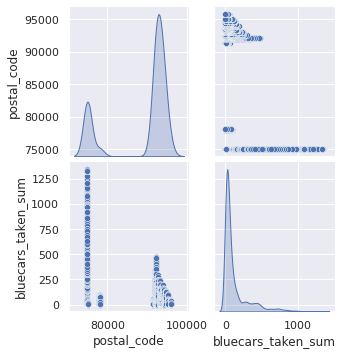

In [46]:
# crossplots
plt.figure(figsize=(14,14))
sns.pairplot(df,diag_kind='kde');

# Sampling

In [100]:
# create an array of postal codes
postal_codes = np.sort(df.postal_code.unique())
postal_codes

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [60]:
# checking number of postal codes
n = len(pd.unique(df['postal_code']))
n

104

In [93]:
# group the random postal codes one df
random1 = 75015
random2 = 75017
random_codes = df.loc[(df['postal_code'] == random1) | (df['postal_code'] == random2)]
random_codes.head()


,postal_code,date,day_type,bluecars_taken_sum
2184,75015,2018-01-01,weekday,781
2185,75015,2018-01-02,weekday,710
2186,75015,2018-01-03,weekday,739
2187,75015,2018-01-04,weekday,669
2188,75015,2018-01-05,weekday,852


In [94]:
# check for normality using shapiro
from scipy.stats import shapiro

postal_codes = np.array(postal_codes)
codes_mean = np.mean(postal_codes)
codes_strd = np.std(postal_codes)
postal_codes = np.random.normal(codes_mean,codes_strd, 104)

stat,p = shapiro(postal_codes)
print('statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('its Gaussian ')
else:
  print('not Gaussian')


statistics=0.994, p=0.914
its Gaussian 


# Hypothesis Testing

In [95]:
# group the random postal codes to weekend
bluecars_weekend = random_codes[random_codes['day_type'] == 'weekend']
bluecars_weekend.head()

,postal_code,date,day_type,bluecars_taken_sum
2189,75015,2018-01-06,weekend,1061
2190,75015,2018-01-07,weekend,913
2196,75015,2018-01-13,weekend,1255
2197,75015,2018-01-14,weekend,1097
2203,75015,2018-01-20,weekend,1352


In [96]:
# group the random postal codes 
random1_weekend = bluecars_weekend[bluecars_weekend['postal_code']==random1]
random2_weekend = bluecars_weekend[bluecars_weekend['postal_code']==random2]

In [97]:
# check shape for random postal code 1
print(random1_weekend.shape)

(44, 4)


In [98]:
# check shape for random postal code 2
print(random2_weekend.shape)

(44, 4)


In [99]:
# z-test
from statsmodels.stats import weightstats as stests

ztest, pval = stests.ztest(random1_weekend['bluecars_taken_sum'] , x2=random2_weekend['bluecars_taken_sum'], value=0, alternative='two-sided')
print(float(pval))

alpha = 0.05
if pval < alpha:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

1.528083651355572e-09
we reject null hypothesis


# Conclusion

We reject the null hypothesis since the p value is less than the alpha 0.05 which is our significance level.

Thus we accept our alternative hypothesis